In [1]:
# import os
# # import SimpleITK as sitk
# import elastix

root_folder = r"C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT"
data_path = r"C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\sessie 1_30-01-2024\2. 01_2019\0.4_Qr40"


In [4]:
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk
import pydicom

# IMPORTANT: these paths may differ on your system, depending on where
# Elastix has been installed. Please set accordingly.
ELASTIX_PATH = os.path.join(r'C:\Tim\Software\Elastix\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Tim\Software\Elastix\transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Make a results directory if non exists
if os.path.exists('results') is False:
    os.mkdir('results')


tue/elastix wrapper


In [3]:
fixed_image_path = os.path.join(data_path, 'Schaedel_nach_C.CT.Knie(Adult).28.15.2024.02.19.15.02.17.192.77332975.dcm')
moving_image_path = os.path.join(data_path, 'Schaedel_nach_C.CT.Knie(Adult).28.18.2024.02.19.15.02.17.192.77333008.dcm')

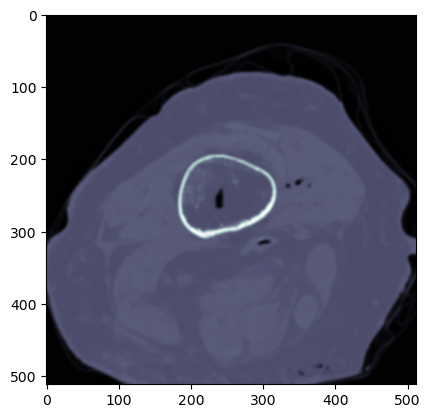

In [4]:
fix_im = pydicom.dcmread(fixed_image_path)
plt.imshow(fix_im.pixel_array, cmap=plt.cm.bone) 

mov_im = pydicom.dcmread(moving_image_path)
plt.imshow(mov_im.pixel_array, cmap=plt.cm.bone) 

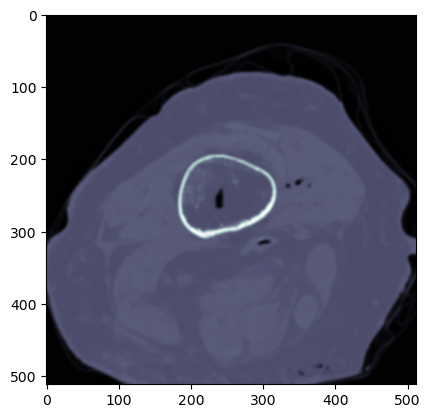

In [5]:
mov_im = pydicom.dcmread(moving_image_path)
plt.imshow(mov_im.pixel_array, cmap=plt.cm.bone) 

In [6]:
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[r'C:\Users\T2025\Desktop\cadaver_knee_study\code\config\elastix\parameters_exmpl.txt'],
    output_dir='results')

# result_path = os.path.join(root_folder,'results', 'result.0.tiff')

C:\Tim\Software\Elastix\elastix.exe -f C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\sessie 1_30-01-2024\2. 01_2019\0.4_Qr40\Schaedel_nach_C.CT.Knie(Adult).28.15.2024.02.19.15.02.17.192.77332975.dcm -m C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\sessie 1_30-01-2024\2. 01_2019\0.4_Qr40\Schaedel_nach_C.CT.Knie(Adult).28.18.2024.02.19.15.02.17.192.77333008.dcm -p C:\Users\T2025\Desktop\cadaver_knee_study\code\config\elastix\parameters_exmpl.txt -out results


ElastixError: Elastix crashed with code 1 for command 'C:\Tim\Software\Elastix\elastix.exe -f C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\sessie 1_30-01-2024\2. 01_2019\0.4_Qr40\Schaedel_nach_C.CT.Knie(Adult).28.15.2024.02.19.15.02.17.192.77332975.dcm -m C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\sessie 1_30-01-2024\2. 01_2019\0.4_Qr40\Schaedel_nach_C.CT.Knie(Adult).28.18.2024.02.19.15.02.17.192.77333008.dcm -p C:\Users\T2025\Desktop\cadaver_knee_study\code\config\elastix\parameters_exmpl.txt -out results'.

In [ ]:
# Find the results
transform_path = os.path.join('results', 'TransformParameters.0.txt')
result_path = os.path.join('results', 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join('results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')


In [ ]:
import SimpleITK as sitk

resultImage = sitk.Elastix(sitk.ReadImage("fixedImage.nii"), \
                           sitk.ReadImage("movingImage.nii"), \
                           "translation")


Additional


In [23]:
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk

# IMPORTANT: these paths may differ on your system, depending on where
# Elastix has been installed. Please set accordingly.
ELASTIX_PATH = os.path.join(r'C:\Tim\Software\Elastix')
TRANSFORMIX_PATH = os.path.join(r'C:\Tim\Software\Elastix')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Make a results directory if non exists
if os.path.exists('results') is False:
    os.mkdir('results')

# Define the paths to the two images you want to register
fixed_image_path = os.path.join('example_data', 'patient1.jpg')
moving_image_path = os.path.join('example_data', 'patient2.jpg')



# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join('example_data', 'parameters_bspline_multires_MR.txt')],
    output_dir='results')

# Find the results
transform_path = os.path.join('results', 'TransformParameters.0.txt')
result_path = os.path.join('results', 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join('results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

NameError: name 'data_path' is not defined

In [24]:
fixed_image_path = os.path.join(r'C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\ME_data\07_2017', r'Beeldvorming-Dr.CT.Knie_ortho(Adul.706.322.2024.04.12.15.26.50.347.45932597.dcm')
moving_image_path = os.path.join(r'C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\ME_data\07_2017', r'Beeldvorming-Dr.CT.Knie_ortho(Adul.706.318.2024.04.12.15.26.50.347.45932641.dcm')


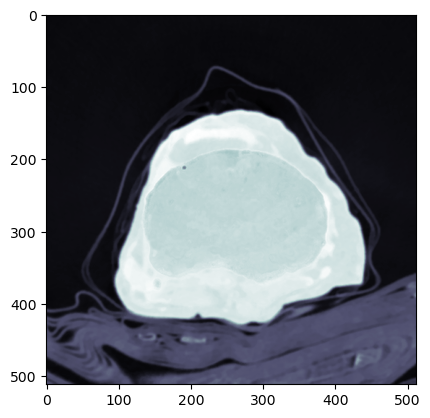

In [25]:
fix_im = pydicom.dcmread(fixed_image_path)
plt.imshow(fix_im.pixel_array, cmap=plt.cm.bone) 
fix_im = fix_im.pixel_array

In [29]:
import matplotlib.image

matplotlib.image.imsave('fixed_im.jpg', fix_im)

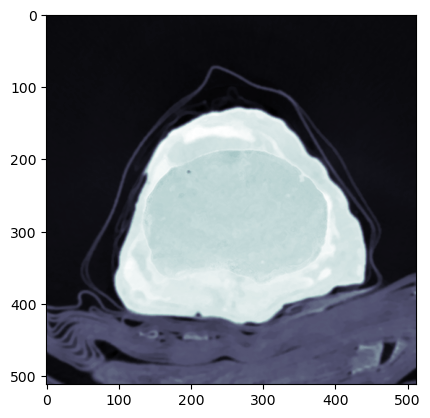

In [27]:
mov_im = pydicom.dcmread(moving_image_path)
plt.imshow(mov_im.pixel_array, cmap=plt.cm.bone) 
mov_im = mov_im.pixel_array

In [30]:
matplotlib.image.imsave('moving_im.jpg', mov_im)

In [ ]:
empl_im = pydicom.dcmread()